In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_all = pd.read_csv("/content/drive/MyDrive/mydata/Accidents0515.csv")

In [4]:
df_all

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,6,30,0,-1,-1,0,0,0,7,1,2,0,0,1,1,E01002863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780648,2015984139115,312087.0,570791.0,-3.376671,55.023855,98,3,3,1,11/12/2015,6,13:24,917,S12000006,3,75,6,60,0,-1,-1,0,0,0,1,1,2,0,0,2,1,NaN
1780649,2015984139715,320671.0,569791.0,-3.242159,55.016316,98,3,2,1,02/12/2015,4,13:50,917,S12000006,4,722,6,60,3,4,6,0,0,0,1,1,2,0,0,2,1,NaN
1780650,2015984140215,311731.0,586343.0,-3.387067,55.163502,98,2,1,4,23/12/2015,4,00:01,917,S12000006,2,74,3,70,0,-1,-1,0,0,0,6,4,2,0,0,2,1,NaN
1780651,2015984140515,328273.0,570137.0,-3.123385,55.020580,98,3,3,3,26/12/2015,7,12:40,917,S12000006,4,7076,6,60,5,4,2,74,0,0,1,2,2,0,0,2,1,NaN


In [5]:
df_all.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

In [6]:
df_all = df_all[pd.notnull(df_all['Longitude'])]
df_all = df_all[pd.notnull(df_all['Latitude'])]

In [7]:
df_all.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                               0
Location_Northing_OSGR                              0
Longitude                                           0
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

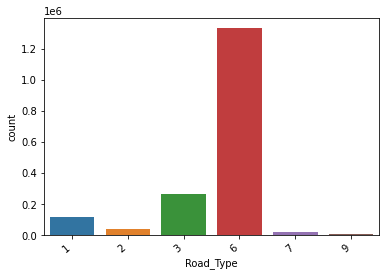

<Figure size 3600x1440 with 0 Axes>

In [8]:
ax = sns.countplot(x = df_all['Road_Type'],label="Count")

plt.figure(figsize=(50, 20))

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

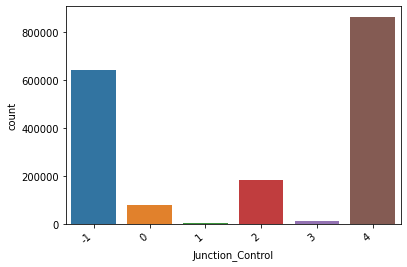

<Figure size 3600x1440 with 0 Axes>

In [9]:
ax = sns.countplot(x = df_all['Junction_Control'],label="Count")

plt.figure(figsize=(50, 20))

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

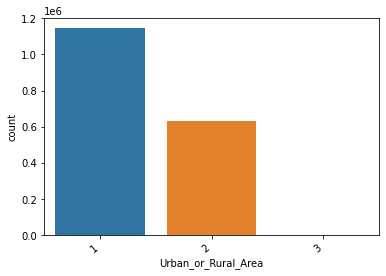

<Figure size 3600x1440 with 0 Axes>

In [10]:
ax = sns.countplot(x = df_all['Urban_or_Rural_Area'],label="Count")

plt.figure(figsize=(50, 20))

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [11]:

import imblearn
print(imblearn.__version__)

from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [12]:
df_all = df_all.drop(['Accident_Index','Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'], axis=1)

In [13]:
df_all['Date'] = pd.to_datetime(df_all['Date'], errors='coerce')

In [14]:
df_all

,Longitude,Latitude,Date,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
0,-0.191170,51.489096,2005-04-01,6,30,1,2,2,1
1,-0.211708,51.520075,2005-05-01,3,30,4,1,1,1
2,-0.206458,51.525301,2005-06-01,6,30,4,1,1,1
3,-0.173862,51.482442,2005-07-01,6,30,1,1,1,1
4,-0.156618,51.495752,2005-10-01,6,30,7,1,2,1
...,...,...,...,...,...,...,...,...,...
1780648,-3.376671,55.023855,2015-11-12,6,60,1,1,2,2
1780649,-3.242159,55.016316,2015-02-12,6,60,1,1,2,2
1780650,-3.387067,55.163502,2015-12-23,3,70,6,4,2,2
1780651,-3.123385,55.020580,2015-12-26,6,60,1,2,2,2


In [15]:
df_all.columns

Index(['Longitude', 'Latitude', 'Date', 'Road_Type', 'Speed_limit',
       'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
       'Urban_or_Rural_Area'],
      dtype='object')

In [16]:
df_all['Date'] = df_all['Date'].astype('datetime64[ns]')
df_all['Longitude'] = df_all['Longitude'].astype('object')
df_all['Latitude'] = df_all['Latitude'].astype('object')
df_all['Road_Type'] = df_all['Road_Type'].astype('object')
df_all['Speed_limit'] = df_all['Speed_limit'].astype('object')
df_all['Light_Conditions'] = df_all['Light_Conditions'].astype('object')
df_all['Weather_Conditions'] = df_all['Weather_Conditions'].astype('object')
df_all['Road_Surface_Conditions'] = df_all['Road_Surface_Conditions'].astype('object')
df_all['Urban_or_Rural_Area'] = df_all['Urban_or_Rural_Area'].astype('object')


In [17]:
df_all = df_all[pd.notnull(df_all['Date'])]

In [18]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1780515 entries, 0 to 1780652
Data columns (total 9 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Longitude                object        
 1   Latitude                 object        
 2   Date                     datetime64[ns]
 3   Road_Type                object        
 4   Speed_limit              object        
 5   Light_Conditions         object        
 6   Weather_Conditions       object        
 7   Road_Surface_Conditions  object        
 8   Urban_or_Rural_Area      object        
dtypes: datetime64[ns](1), object(8)
memory usage: 135.8+ MB


In [19]:
df_all['Date'] = df_all['Date'].dt.month

In [20]:
df_all['Date'].unique().tolist()

[4, 5, 6, 7, 10, 11, 1, 8, 2, 3, 12, 9]

In [21]:
X = df_all.drop('Date', axis=1)

Y = df_all['Date'] #Gets the Target Variable

X


,Longitude,Latitude,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
0,-0.19117,51.4891,6,30,1,2,2,1
1,-0.211708,51.5201,3,30,4,1,1,1
2,-0.206458,51.5253,6,30,4,1,1,1
3,-0.173862,51.4824,6,30,1,1,1,1
4,-0.156618,51.4958,6,30,7,1,2,1
...,...,...,...,...,...,...,...,...
1780648,-3.37667,55.0239,6,60,1,1,2,2
1780649,-3.24216,55.0163,6,60,1,1,2,2
1780650,-3.38707,55.1635,3,70,6,4,2,2
1780651,-3.12338,55.0206,6,60,1,2,2,2


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_X

array([[0.78948798, 0.14534004, 0.625     , ..., 0.3       , 0.5       ,
        0.        ],
       [0.78727441, 0.14819667, 0.25      , ..., 0.2       , 0.33333333,
        0.        ],
       [0.78784025, 0.14867856, 0.625     , ..., 0.2       , 0.33333333,
        0.        ],
       ...,
       [0.44503701, 0.48416351, 0.25      , ..., 0.5       , 0.5       ,
        0.5       ],
       [0.47345643, 0.47098442, 0.625     , ..., 0.3       , 0.5       ,
        0.5       ],
       [0.449178  , 0.47864684, 0.25      , ..., 0.4       , 0.83333333,
        0.5       ]])

In [23]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import EditedNearestNeighbours 

enn = EditedNearestNeighbours()

X, Y = enn.fit_resample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

len(x_train)+ len(x_test) == len(X)

True

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(random_state=0)

clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [26]:
y_pred = clf.predict(x_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

print('Accuracy of Decision Tree classifier on the training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on the test set: {:.2f}'.format(clf.score(x_test, y_test)))

#Decision Trees are very prone to overfitting as shown in the scores

score = cross_val_score(clf, x_train, y_train, cv=5) 
print('Cross-validation score: ',score)
print('Cross-validation mean score: ',score.mean())

              precision    recall  f1-score   support

           1       0.29      0.38      0.33       102
           2       0.99      0.98      0.99     39312
           3       0.40      0.44      0.42        50
           4       0.40      0.41      0.41        39
           5       0.41      0.49      0.45        68
           6       0.33      0.44      0.38        62
           7       0.44      0.40      0.42        75
           8       0.25      0.36      0.29        45
           9       0.45      0.46      0.45        68
          10       0.40      0.45      0.43        77
          11       0.31      0.35      0.33        99
          12       0.29      0.34      0.31       132

    accuracy                           0.97     40129
   macro avg       0.41      0.46      0.43     40129
weighted avg       0.97      0.97      0.97     40129

Accuracy of Decision Tree classifier on the training set: 1.00
Accuracy of Decision Tree classifier on the test set: 0.97
Cross-valid

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [29]:
print(classification_report(y_test, y_pred))

print('Accuracy of Decision Tree classifier on the training set: {:.2f}'.format(rfc.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on the test set: {:.2f}'.format(rfc.score(x_test, y_test)))

#Decision Trees are very prone to overfitting as shown in the scores

score = cross_val_score(rfc, x_train, y_train, cv=5) 
print('Cross-validation score: ',score)
print('Cross-validation mean score: ',score.mean())

              precision    recall  f1-score   support

           1       0.89      0.38      0.53       102
           2       0.99      1.00      0.99     39312
           3       0.82      0.46      0.59        50
           4       0.76      0.41      0.53        39
           5       0.79      0.50      0.61        68
           6       0.84      0.42      0.56        62
           7       0.97      0.40      0.57        75
           8       0.67      0.31      0.42        45
           9       0.86      0.53      0.65        68
          10       0.78      0.38      0.51        77
          11       0.93      0.27      0.42        99
          12       0.90      0.39      0.55       132

    accuracy                           0.99     40129
   macro avg       0.85      0.45      0.58     40129
weighted avg       0.98      0.99      0.98     40129

Accuracy of Decision Tree classifier on the training set: 1.00
Accuracy of Decision Tree classifier on the test set: 0.99
Cross-valid

In [30]:
test1 = rfc.predict([[-0.19117,51.4891,6,30,1,2,2,1]])

a = rfc.predict_proba([[-0.19117,51.4891,6,30,1,2,2,1]])

print(test1)
print(a)
print(rfc.classes_)

[2]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [31]:
import joblib
joblib.dump(rfc, 'model.pkl')

['model.pkl']

In [32]:
print(sklearn. __version__)

0.22.2.post1
